In [18]:
import numpy as np
import scipy.stats as stats
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from scipy.misc import factorial
% matplotlib inline

In [19]:
yeti_data = np.loadtxt('MSY3K_data.csv', delimiter= ',', skiprows = 1)
number = np.array(yeti_data[:, 0]).reshape((6,6))
B = np.array(yeti_data[:, 1]).reshape((6,6))
Q = np.array(yeti_data[:, 2]).reshape((6,6))
eta = np.array(yeti_data[:, 3]).reshape((6,6))

In [20]:
round(1123.456789, 0)

1123.0

In [6]:
def factorial(x):
    
    if x%1 !=0:
        raise SystemExit('Error: This function only takes integers')
    
    out = 1.0
    
    if x == 0:
        
        out = 1.0
    else:
    
        for i in np.arange(x, 0, -1):
            out *= i
    
    return out
        

In [7]:
factorial(4)

24.0

In [8]:
def pop(alpha, beta):
    
    return np.around(B**alpha*Q**beta, 0)

def rel_likelihood(prior, posterior, observed):
    
    pr = prior.flatten()
    po = posterior.flatten()
    obs = observed.flatten()
    temp = []
    
    for i, j in enumerate(pr):
        
        temp.append((obs[i]+1)**(po[i]-pr[i])*(factorial(pr[i])/factorial(po[i])))
    
    output = np.product(temp)
    return(output)

In [9]:
prior = np.array([[0, 1.4],[0, 1.4]])
print(prior[1, 1])

1.4


In [10]:

def step(alpha_k, beta_k, step_size, prior):
    
    alpha_new, beta_new = 99999999, 9999999
    
    while alpha_new <= prior[0,0] or alpha_new >= prior[0, 1] or beta_new <= prior[1, 0] or beta_new >= prior[1, 1]:
        
        theta = np.random.uniform(0, 2*np.pi)
        alpha_step = step_size*np.cos(theta)
        beta_step = step_size*np.sin(theta)
    
        alpha_new = alpha_k+alpha_step 
        beta_new = beta_k+beta_step
        
        distance = np.sqrt((alpha_new-alpha_k)**2+(beta_new-beta_k)**2)
        
        
    return([alpha_new, beta_new])
    



In [11]:
a_i = [0.5]
b_i = [0.5]


for i in range(100000):
    
    newloc = step(a_i[-1], b_i[-1], 0.1, prior)
    oldpop = pop(a_i[-1], b_i[-1])
    newpop = pop(newloc[0], newloc[1])
    
    rho = rel_likelihood(oldpop, newpop, eta)
    
    if rho >= 1.0:
        
        a_i.append(newloc[0])
        b_i.append(newloc[1])
    
    else:
        
        random_number = np.random.random()
        
        if random_number<rho:
            
            a_i.append(newloc[0])
            b_i.append(newloc[1])
        
        else:
            
            a_i.append(a_i[-1])
            b_i.append(b_i[-1])

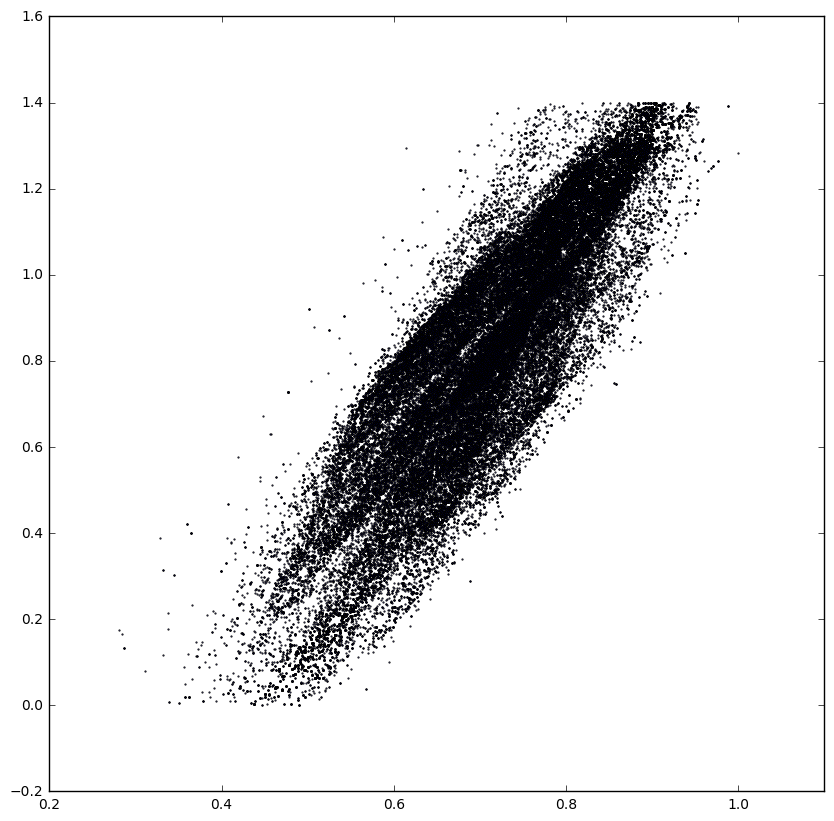

In [17]:
fig = plt.figure(figsize=[10, 10])
plt.scatter(a_i, b_i, s = 0.3)

    
    
    
    
    

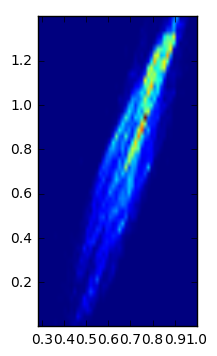

In [13]:
heatmap, xedges, yedges = np.histogram2d(a_i, b_i, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [24]:
print(reject)

0


In [24]:
np.savetxt('MCMC2.txt', b_i, delimiter=',')